In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import models,layers
import matplotlib.pyplot as plt

In [2]:
image_size = 256
batch_size = 35
channels = 3
epochs = 150

In [3]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
"WormData",
shuffle = True,
image_size = (image_size, image_size),
)

Found 240 files belonging to 2 classes.


In [4]:
#  corn earworm
# corn fall armyworm

In [5]:
class_name = dataset.class_names
class_name

['corn_earworm', 'fall_armyworm']

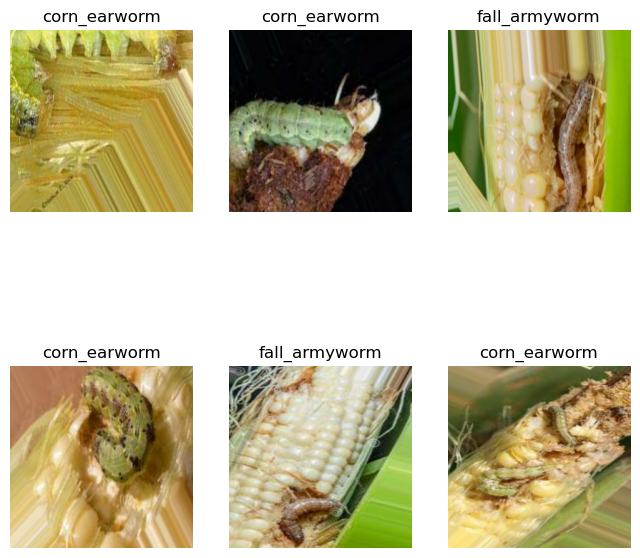

In [6]:
plt.figure(figsize = (8,8))
for image_batch, label_batch in dataset.take(1):
    for i in range(6):
        ax = plt.subplot(2,3,i+1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_name[label_batch[i]])
        plt.axis("off")

In [4]:
print(len(dataset))

8


In [5]:
dataset

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [9]:
len(dataset)

8

In [10]:
# Spli dataset into train, test and validation
def get_dataset_partitions_tf(ds, train_split = 0.7, test_split = 0.3, shuffle = True, shuffle_size = 10 ):
    ds_size = len(ds) #8
    train_size = int(train_split* ds_size)
    train_ds = ds.take(train_size)
    
    test_size = int(test_split * ds_size)
    test_ds = ds.skip(train_size).take(test_size)
    return train_ds, test_ds

In [11]:
train_ds, test_ds = get_dataset_partitions_tf(dataset)
print(len(train_ds))
print(len(test_ds))

5
2


In [12]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)

test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)

In [13]:
#Data scaling, resizing
resize_and_rescale = tf.keras.Sequential([
    layers.experimental.preprocessing.Resizing(image_size, image_size),
    layers.experimental.preprocessing.Rescaling(1.0/255)  #standardization
])

In [14]:
input_shape = (batch_size, image_size, image_size, channels)
n_classes = 2
model = models.Sequential([
    resize_and_rescale,
    layers.Conv2D(32, (3,3), activation = "relu", input_shape = input_shape),
    layers.MaxPooling2D((2,2)),
    
    layers.Conv2D(64, kernel_size = (3,3), activation = "relu"),
    layers.MaxPooling2D((2,2)),
    
    layers.Conv2D(64, kernel_size = (3,3), activation = "relu"),
    layers.MaxPooling2D((2,2)),
    
    layers.Conv2D(64, kernel_size = (3,3), activation = "relu"),
    layers.MaxPooling2D((2,2)),
    
    layers.Conv2D(64, kernel_size = (3,3), activation = "relu"),
    layers.MaxPooling2D((2,2)),
    
    layers.Conv2D(64, kernel_size = (3,3), activation = "relu"),
    layers.MaxPooling2D((2,2)),
    
    layers.Flatten(),
    layers.Dense(64, activation = "relu"),  #dense layer
    layers.Dense(n_classes, activation = "softmax")  #output layer
    
])

model.build(input_shape = input_shape)

In [15]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (32, 256, 256, 3)         0         
                                                                 
 conv2d (Conv2D)             (32, 254, 254, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (32, 127, 127, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (32, 125, 125, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (32, 62, 62, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (32, 60, 60, 64)         

In [16]:
model.compile(
    optimizer = "adam",
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = False),
    metrics = ["accuracy"]
)

In [17]:
history = model.fit(train_ds,
                   epochs = epochs,
                   batch_size = batch_size,
                   verbose = 1,
                   validation_data = test_ds)

Epoch 1/150
5/5 [==============================] - 6s 944ms/step - loss: 0.6944 - accuracy: 0.4875 - val_loss: 0.6876 - val_accuracy: 0.7188
Epoch 2/150
5/5 [==============================] - 4s 868ms/step - loss: 0.6884 - accuracy: 0.5813 - val_loss: 0.7053 - val_accuracy: 0.4531
Epoch 3/150
5/5 [==============================] - 4s 873ms/step - loss: 0.6929 - accuracy: 0.5188 - val_loss: 0.6903 - val_accuracy: 0.4531
Epoch 4/150
5/5 [==============================] - 4s 845ms/step - loss: 0.6798 - accuracy: 0.5562 - val_loss: 0.6668 - val_accuracy: 0.5938
Epoch 5/150
5/5 [==============================] - 4s 829ms/step - loss: 0.6426 - accuracy: 0.6875 - val_loss: 0.7524 - val_accuracy: 0.4844
Epoch 6/150
5/5 [==============================] - 4s 830ms/step - loss: 0.6393 - accuracy: 0.6125 - val_loss: 0.6411 - val_accuracy: 0.5625
Epoch 7/150
5/5 [==============================] - 4s 836ms/step - loss: 0.5633 - accuracy: 0.7188 - val_loss: 0.5175 - val_accuracy: 0.7656
Epoch 8/150
5

5/5 [==============================] - 4s 823ms/step - loss: 2.8561e-05 - accuracy: 1.0000 - val_loss: 0.1821 - val_accuracy: 0.9375
Epoch 115/150
5/5 [==============================] - 4s 823ms/step - loss: 2.6776e-05 - accuracy: 1.0000 - val_loss: 0.1794 - val_accuracy: 0.9375
Epoch 116/150
5/5 [==============================] - 4s 826ms/step - loss: 2.6116e-05 - accuracy: 1.0000 - val_loss: 0.1785 - val_accuracy: 0.9375
Epoch 117/150
5/5 [==============================] - 4s 824ms/step - loss: 2.6129e-05 - accuracy: 1.0000 - val_loss: 0.1826 - val_accuracy: 0.9375
Epoch 118/150
5/5 [==============================] - 4s 827ms/step - loss: 2.4392e-05 - accuracy: 1.0000 - val_loss: 0.1810 - val_accuracy: 0.9375
Epoch 119/150
5/5 [==============================] - 4s 830ms/step - loss: 2.3464e-05 - accuracy: 1.0000 - val_loss: 0.1813 - val_accuracy: 0.9375
Epoch 120/150
5/5 [==============================] - 4s 820ms/step - loss: 2.3130e-05 - accuracy: 1.0000 - val_loss: 0.1834 - val_ac

In [18]:
# model evaluation on test datset
score = model.evaluate(test_ds) 

2/2 [==============================] - 0s 164ms/step - loss: 0.1930 - accuracy: 0.9219


In [19]:
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]

loss = history.history["loss"]
val_loss = history.history["val_loss"]

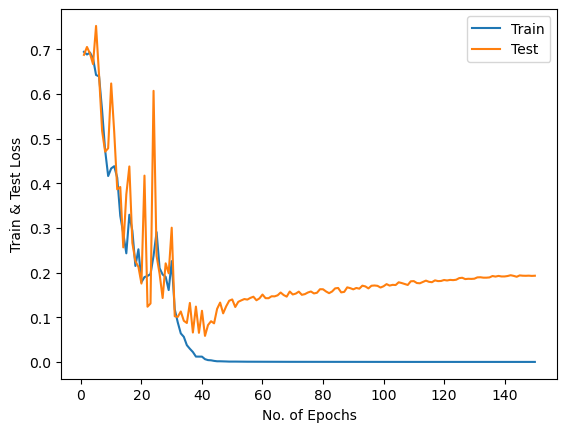

In [20]:
# list of epoch number 
x = list(range(1,epochs+1)) 
plt.xlabel("No. of Epochs")
plt.ylabel("Train & Test Loss")
plt.plot(x, loss)
plt.plot(x, val_loss)
plt.legend(["Train","Test"])
plt.show()

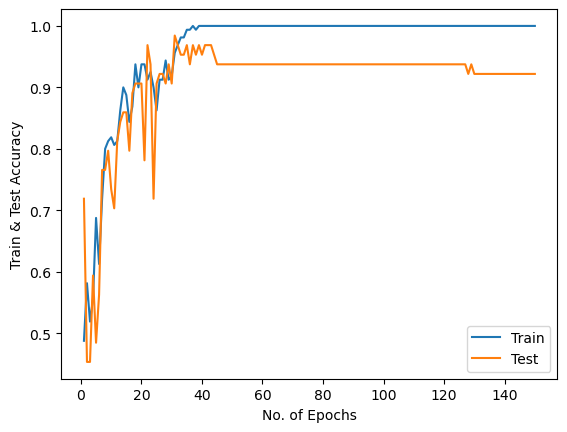

In [21]:
# list of epoch number 
x = list(range(1,epochs+1)) 
plt.xlabel("No. of Epochs")
plt.ylabel("Train & Test Accuracy")
plt.plot(x, acc)
plt.plot(x, val_acc)
plt.legend(["Train","Test"])
plt.show()

First image to predict
Actual label:  fall_armyworm
1/1 [==============================] - 0s 275ms/step
Predicted Lable fall_armyworm with accuracy of:  100.0 %


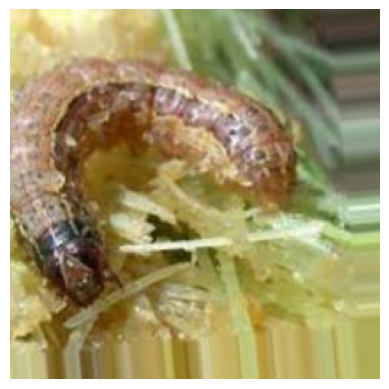

In [22]:
for image_batch, label_batch in test_ds.take(1):
    first_img = image_batch[0].numpy().astype("uint8")
    first_label = label_batch[0].numpy()
    
    print("First image to predict")
    plt.imshow(first_img)
    print("Actual label: ",class_name[first_label])
    
    batch_prediction = model.predict(image_batch)
    print("Predicted Label", class_name[np.argmax(batch_prediction[0])],"with accuracy of: ",
          acc[-1]*100,"%")
    plt.axis("off")

In [23]:
from PIL import Image
image_path=("C:\\Users\\DELL\\Downloads\\sweet_corn.jpg")
image=Image.open(image_path)
image

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\DELL\\Downloads\\sweet_corn.jpg'

In [ ]:
def predict(model,image):
    img_array = tf.keras.preprocessing.image.img_to_array(image)
    img_array = tf.expand_dims(img_array,0) # create a batch
    
    predictions = model.predict(img_array)
    
    predicted_class = class_name[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])),2)
    return predicted_class, confidence

In [ ]:
print(predict(model,image))

In [ ]:
image_path=("C:\\Users\\DELL\\Downloads\\fall_armyworm.jpg")
image=Image.open(image_path)
image

In [ ]:
print(predict(model,image))

In [ ]:
image_path=("C:\\Users\\DELL\\Downloads\\fall_army1.jpg")
image=Image.open(image_path)
image

In [ ]:
print(predict(model,image))

In [ ]:
image_path=("C:\\Users\\DELL\\Downloads\\cornworm.jpg")
image=Image.open(image_path)
image

In [ ]:
print(predict(model,image))